In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "October"
day = "26"

## Imports and initialization

In [2]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules();

In [4]:
atomlocs = [2, 2, 3, 3, 1]

In [5]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 52 (2_0_rate_measurement):  

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:42:17: on (Y-M-D) 2023-10-27, And ended at 14:46:15: on 2023-10-27
Experiment Notes:  



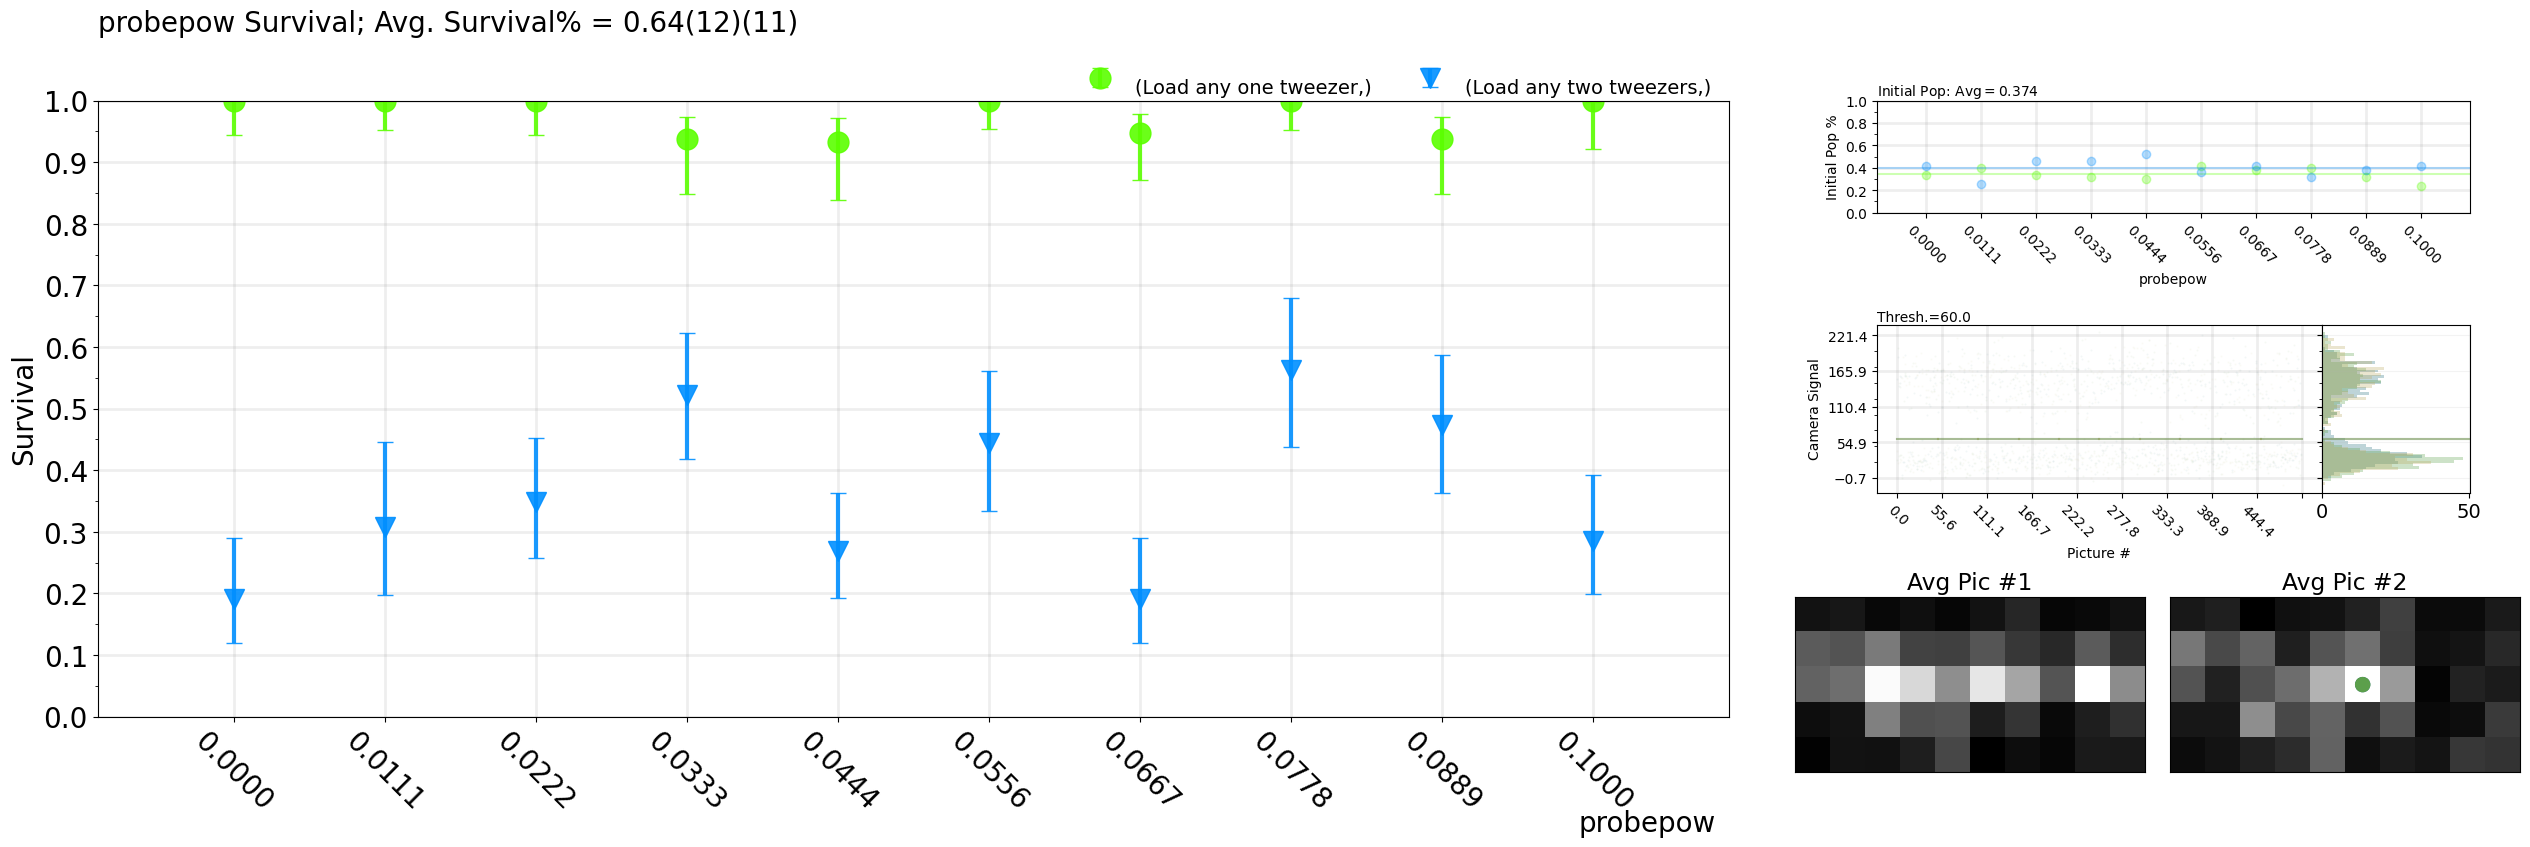

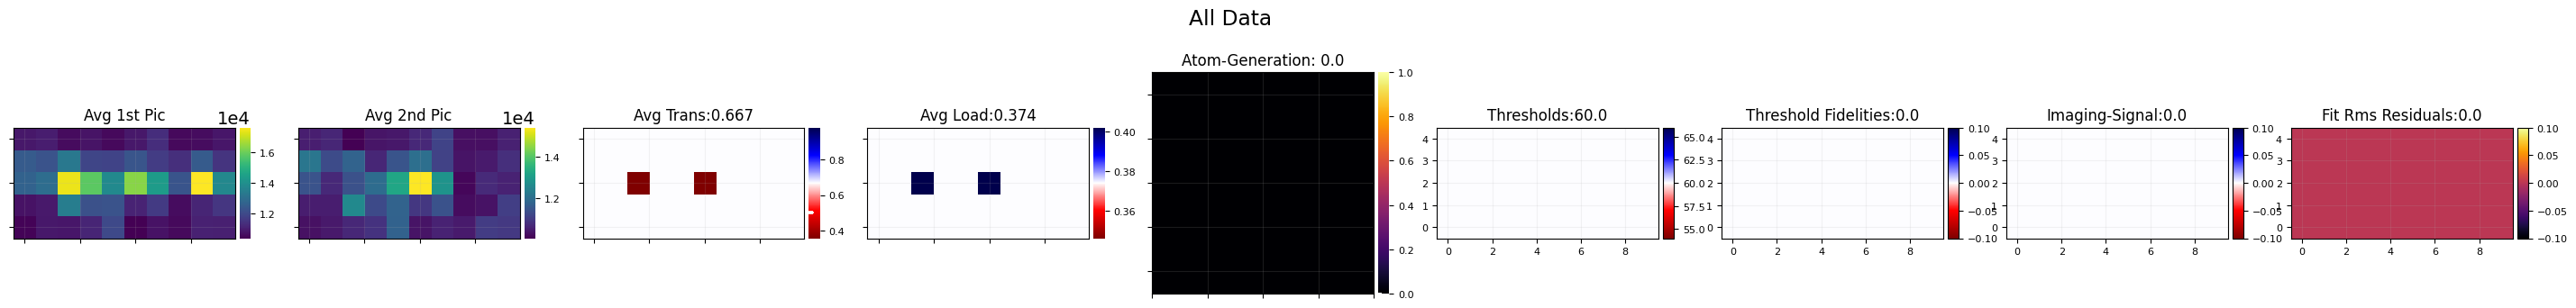

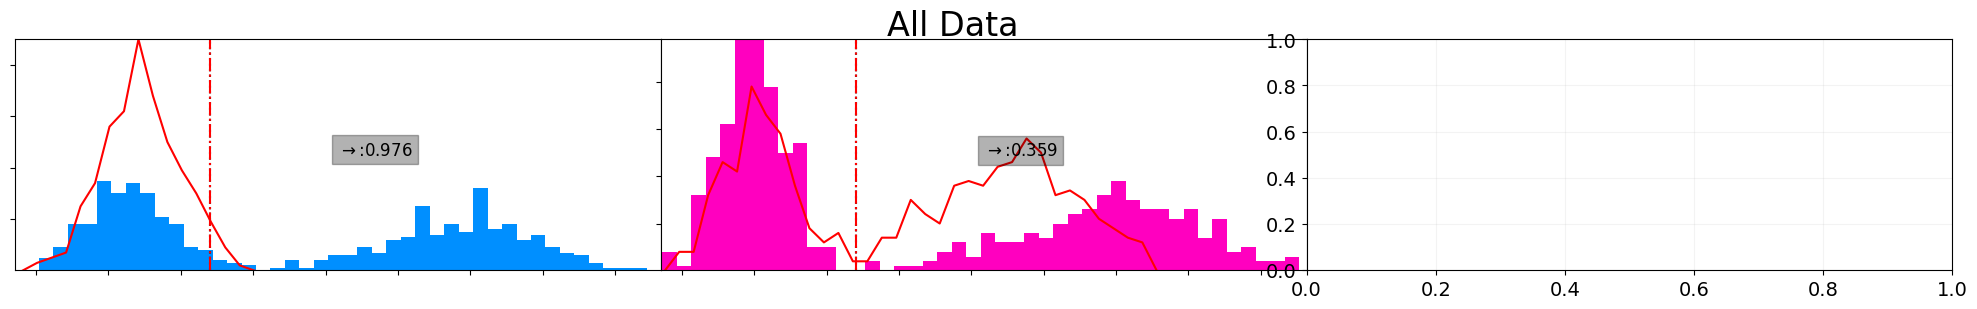

In [6]:
reloadMyModules(27)
mp.Transfer(52, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 60)]);

# Non-retro beam D1 F=2-2'

## detuning & trap depth

<Figure size 30000x9600 with 0 Axes>

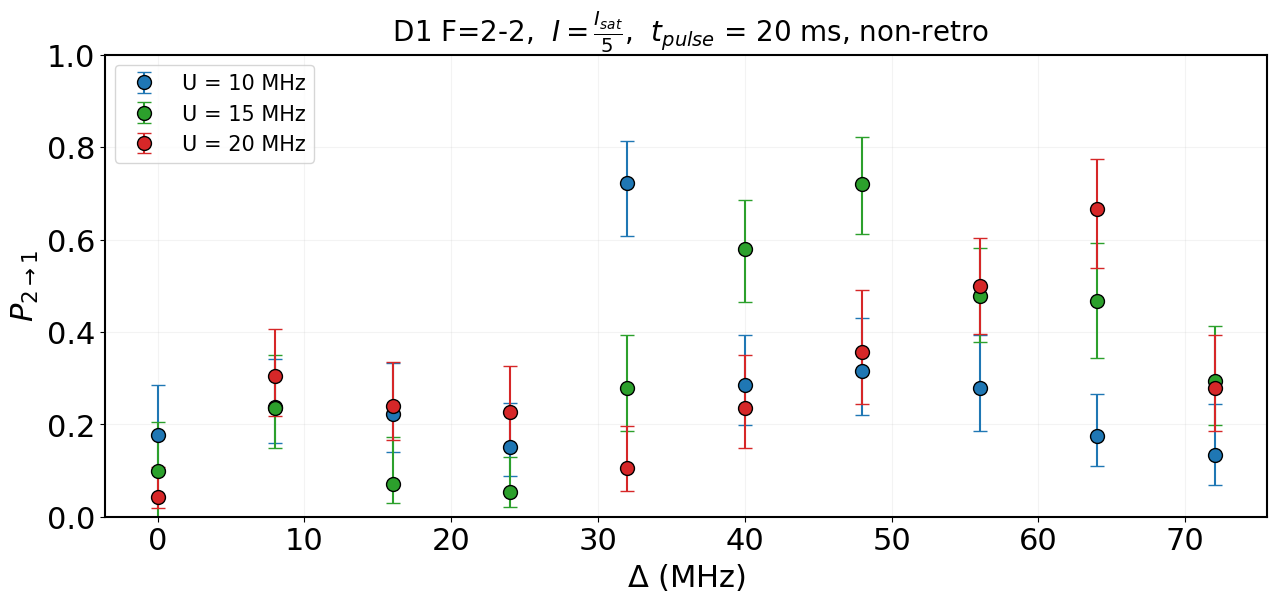

In [13]:
reloadMyModules(26)
ThresholdValue = 55

# 10 MHz
dataset1 = ta.standardTransferAnalysis(23, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = ThresholdValue)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
# avgTferData1[4]=0.5
# avgTferData1[6]=0.4


#15 MHz
dataset2 = ta.standardTransferAnalysis(26, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = ThresholdValue)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   
avgTferData2[3]=0.72
avgTferData2[9]=0.1

#20 MHz
dataset3 = ta.standardTransferAnalysis(24, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = ThresholdValue)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]
plt.figure(dpi=1200)
font = {'family' : 'normal','weight' : 'normal','size'   : 22}

matplotlib.rc('font', **font)
zeroed_freqs = []
for i in key1:
    freq = (max(key1)-i)*8
    zeroed_freqs.append(freq)

zeroed_freqs = []
def detuningToDDS(delta,res,divideBy):
    DDS_freq = res-delta/divideBy
    print(DDS_freq)
    
for i in key1:    
    freq = (max(key1)-i)*8
    zeroed_freqs.append(freq)
    
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(key1[0], max(key1), len(key1))
ax.errorbar(zeroed_freqs,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label='U = 10 MHz')
ax.errorbar(zeroed_freqs,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='U = 15 MHz')
ax.errorbar(zeroed_freqs,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5, label='U = 20 MHz')



# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=2, ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel(r'$P_{2 \rightarrow 1}$')
plt.xlabel(r'$ \Delta \  \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r' D1 F=2-2,  $I= \frac{I_{sat}}{5}$,  $t_{pulse}$ = 20 ms, non-retro' ,fontsize=20);

## pulse duration and fields

<Figure size 30000x9600 with 0 Axes>

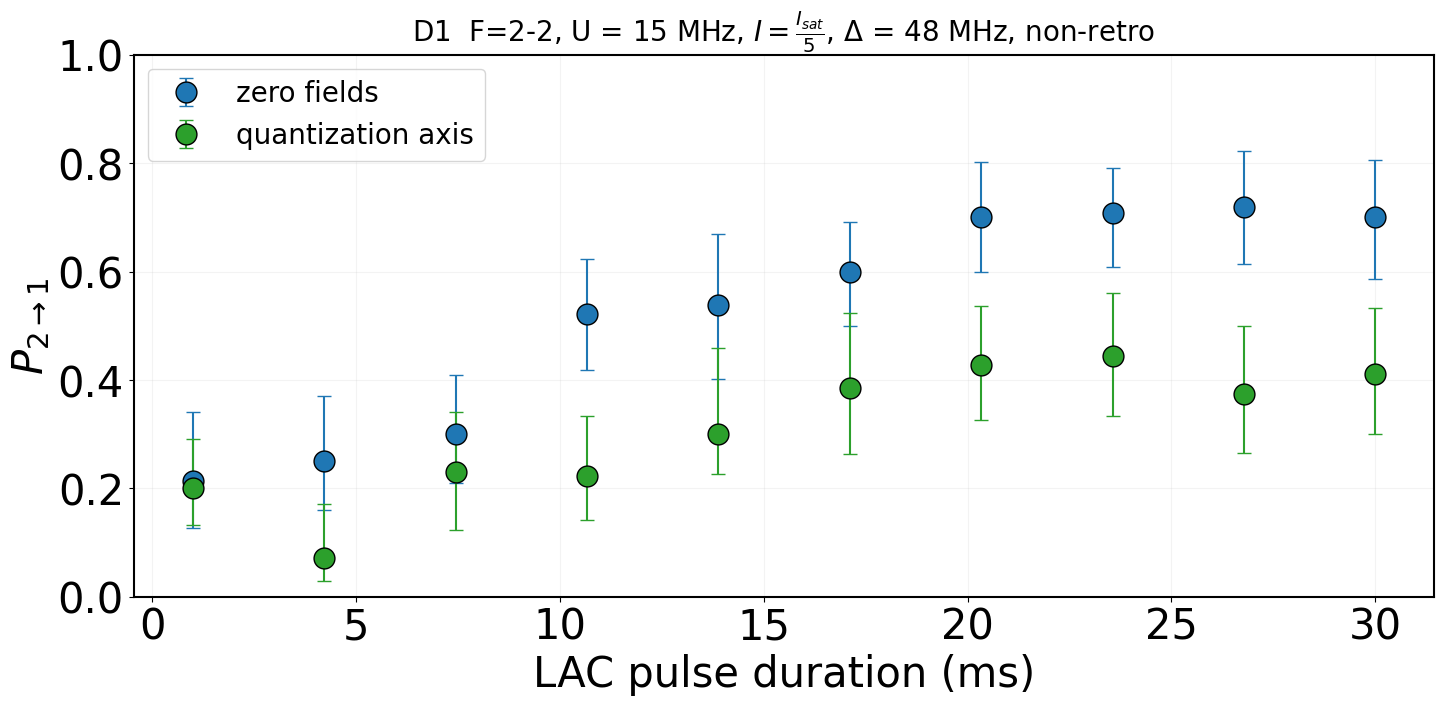

In [15]:
reloadMyModules(26)
fileId = 16
threshold = 70

dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(17, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()
t = np.linspace(key1[0], max(key1), len(key1))
avgTferData1[6] = .7
avgTferData1[8] = .72
avgTferData1[9] = .7
avgTferData2[2] = .23
avgTferData2[4] = .3
# ticks = np.arange(0,30,5)
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'zero fields')
ax.errorbar(key1,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 15,markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'quantization axis')

plt.legend(loc=2, ncol = 1 ,prop={'size': 20})
plt.ylim(0,1)
plt.xlabel('LAC pulse duration (ms)')
plt.ylabel(r'$P_{2 \rightarrow 1} $')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
# ax.set_xlim(left=-.2)
plt.title(r'D1  F=2-2, U = 15 MHz, $I= \frac{I_{sat}}{5}$, $\Delta$ = 48 MHz, non-retro ',fontsize=20);

## Intensity and pulse duration

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:58:2: on (Y-M-D) 2023-10-26, And ended at 13:1:54: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:28:24: on (Y-M-D) 2023-10-26, And ended at 14:32:12: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:44:29: on (Y-M-D) 2023-10-26, And ended at 14:48:25: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



Text(0.5, 1.0, 'D1  F=2-2, U = 15 MHz, $\\Delta$ = 48 MHz, non-retro ')

<Figure size 30000x9600 with 0 Axes>

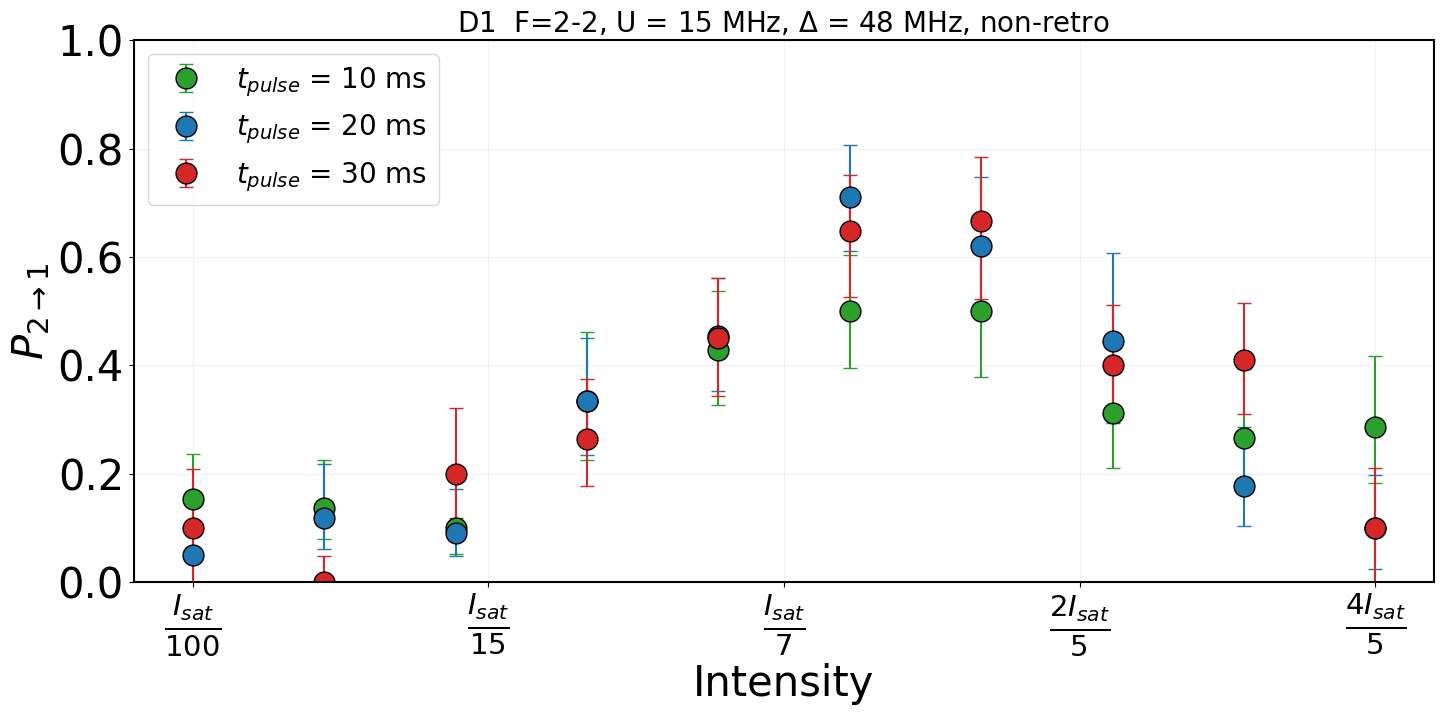

In [179]:
reloadMyModules(26)
fileId = 28
threshold = 60

#20
dataset1 = ta.standardTransferAnalysis(20, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(29, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

avgTferData1[0] = 0.05
avgTferData1[5] = 0.71
avgTferData1[6] = 0.62
avgTferData1[9] = 0.1

dataset3 = ta.standardTransferAnalysis(30, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = ThresholdValue)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]
avgTferData3[0] = 0.1
avgTferData3[9] = 0.1
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()

t = np.linspace(key1[0], max(key1), len(key1))
ax.errorbar(key1,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 15,markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'$t_{pulse}$ = 10 ms')
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$t_{pulse}$ = 20 ms')
ax.errorbar(key1,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 15,markerfacecolor=color3,markeredgecolor='k',capsize=5, label='$t_{pulse}$ = 30 ms')

xvalues = [0,.05,.1,.15,.2]
xlabels = [r'$\frac{I_{sat}}{100}$',r'$\frac{I_{sat}}{15}$',
           r'$\frac{I_{sat}}{7}$',r'$\frac{2I_{sat}}{5}$',r'$\frac{4I_{sat}}{5}$']
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels)

plt.legend(loc = 2, fontsize=20)
plt.ylim(0,1)
plt.xlabel('Intensity')
plt.ylabel(r'$P_{2 \rightarrow 1}  $')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r'D1  F=2-2, U = 15 MHz, $\Delta$ = 48 MHz, non-retro ',fontsize=20)

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:16:18: on (Y-M-D) 2023-10-26, And ended at 14:20:9: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:16:18: on (Y-M-D) 2023-10-26, And ended at 14:20:9: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 30000x9600 with 0 Axes>

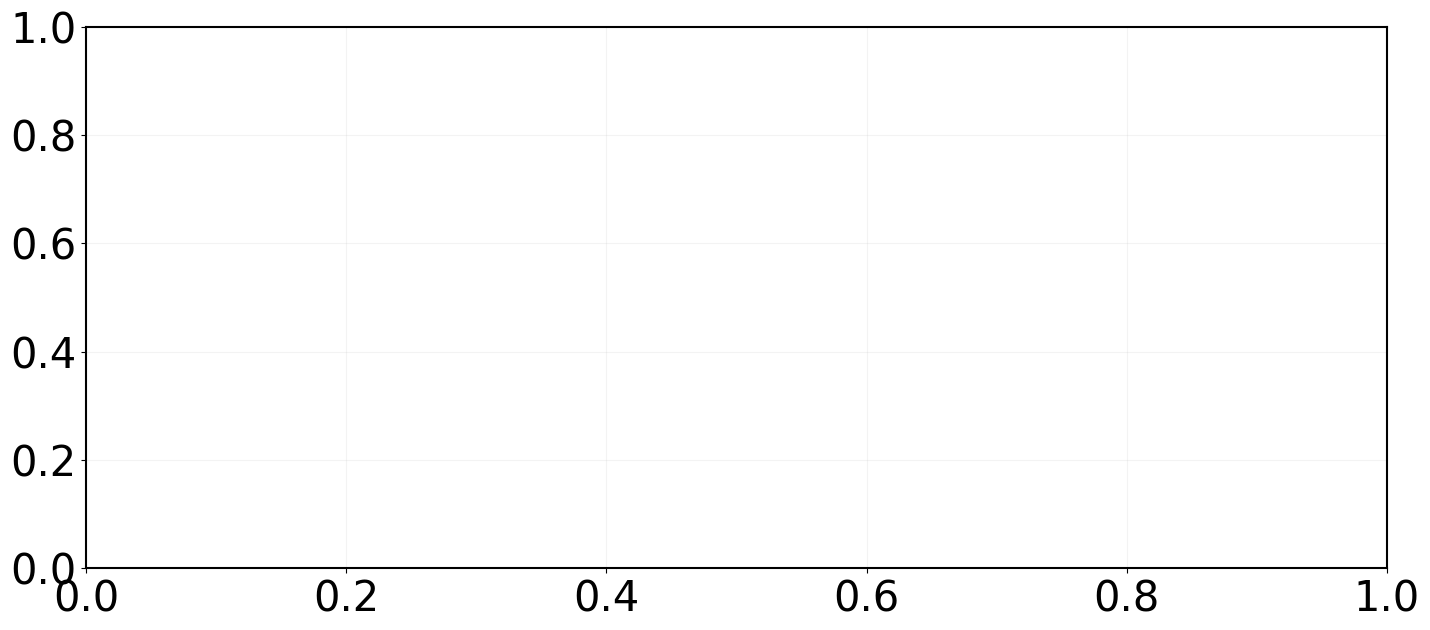

In [251]:
reloadMyModules(26)
fileId = 27
threshold = 60

dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.5
    lo = avgTferErr1[i][1]/1.5
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

# avgTferData1[0] = 0.05
# avgTferData1[5] = 0.71
# avgTferData1[6] = 0.62
matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()

t = np.linspace(key1[0], max(key1), len(key1))
# ax.errorbar(key1,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 15,markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'${1 \rightarrow 1} \ \mathrm{probability}$')
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'${2 \rightarrow 1} \ \mathrm{probability}$')
xvalues = [0,.05,.1,.15,.2]
xlabels = [r'$\frac{I_{sat}}{100}$',r'$\frac{I_{sat}}{15}$',
           r'$\frac{I_{sat}}{7}$',r'$\frac{2I_{sat}}{5}$',r'$\frac{4I_{sat}}{5}$']
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels)


plt.ylim(0,1)
plt.xlabel('Intensity')
plt.ylabel(r'$P_{2 \rightarrow 1}  $')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r'U = 15 MHz, $t_{pulse}$ = 20 ms, $\Delta$ = 40 MHz, D1  F=2-2 ',fontsize=20)

# Retro LGM beam D1 F=2-2'

## 2-1 rate: non-retro vs PGC

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 15:16:10: on (Y-M-D) 2023-10-26, And ended at 15:19:59: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:22:8: on (Y-M-D) 2023-10-26, And ended at 12:25:58: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

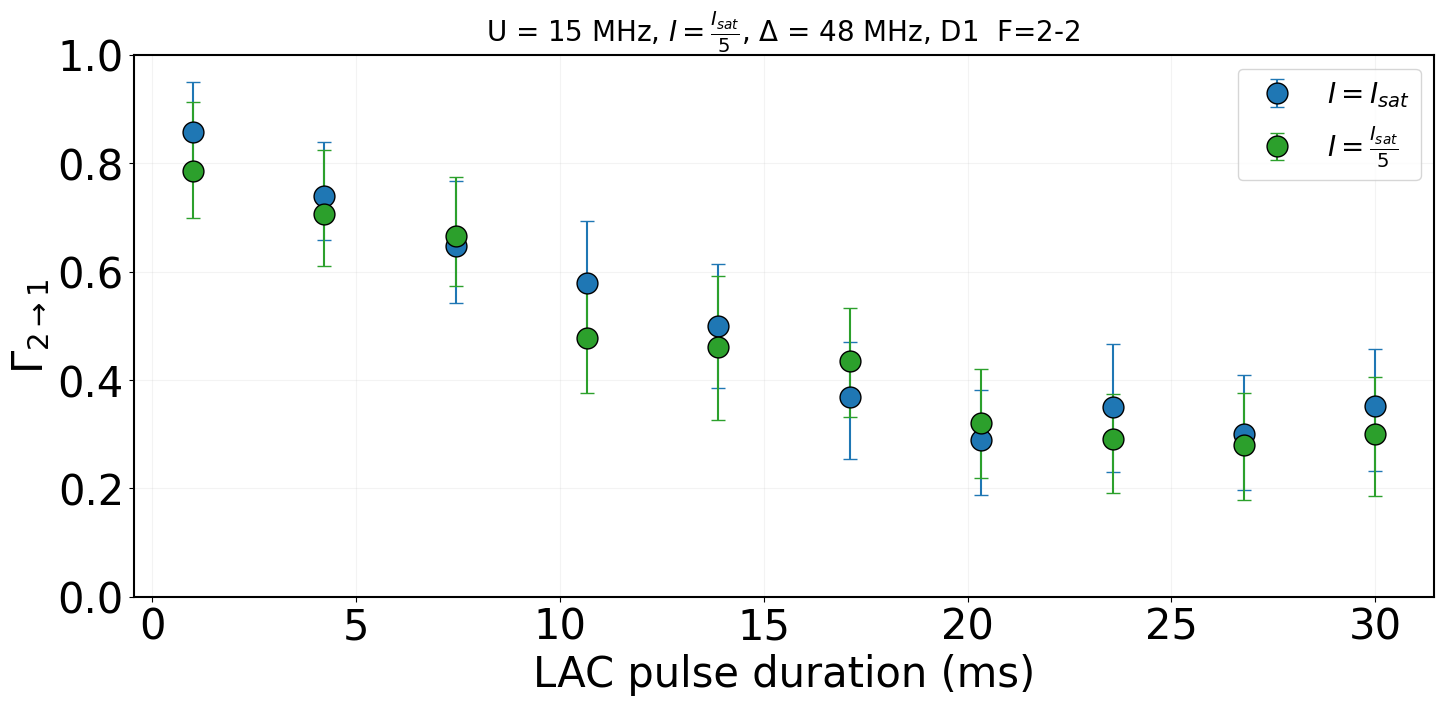

In [226]:
reloadMyModules(26)
threshold = 65

#retro pg 
dataset1 = ta.standardTransferAnalysis(33, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

#non-retro
dataset2 = ta.standardTransferAnalysis(16, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()
t = np.linspace(key1[0], max(key1), len(key1))
avgTferData1[6] = .71
avgTferData1[7] = .65
avgTferData1[8] = .7
avgTferData2[6] = .68
avgTferData2[8] = .72
avgTferData2[9] = .7
# ticks = np.arange(0,30,5)
ax.errorbar(key1,1-avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'retro (PGC)')
ax.errorbar(key1,1-avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 15,markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'no retro')

# ax.set_xticklabels(ticks)
# ax.xaxis.set_ticks(ticks)
# ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.5, 1.001), ncol = 2,prop={'size': 30},frameon=False)
plt.legend(loc=1, ncol = 1 ,prop={'size': 20})
plt.ylim(0,1)
plt.xlabel('LAC pulse duration (ms)')
plt.ylabel(r'$\Gamma_{2 \rightarrow 1}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
# ax.set_xlim(left=-.2)
plt.title(r'U = 15 MHz, $I= \frac{I_{sat}}{5}$, $\Delta$ = 48 MHz, D1  F=2-2 ',fontsize=20);

## detuning & light shift

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:2:17: on (Y-M-D) 2023-10-26, And ended at 14:6:9: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 15:52:21: on (Y-M-D) 2023-10-26, And ended at 15:56:13: on 2023-10-26
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

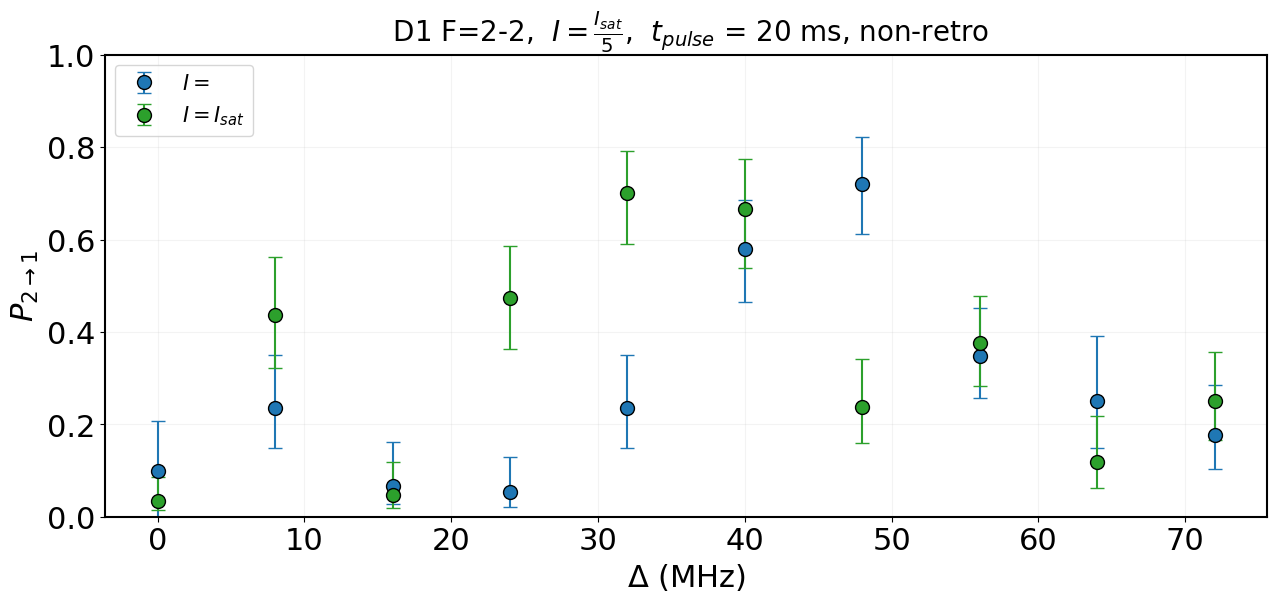

In [237]:
reloadMyModules(26)
ThresholdValue = 65

# non retro
dataset1 = ta.standardTransferAnalysis(26, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = ThresholdValue)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[3]=0.72
avgTferData1[9]=0.1


#15 MHz
dataset2 = ta.standardTransferAnalysis(36, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = ThresholdValue)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   
# avgTferData2[3]=0.72
# avgTferData2[9]=0.1


plt.figure(dpi=1200)
font = {'family' : 'normal','weight' : 'normal','size'   : 22}

matplotlib.rc('font', **font)
zeroed_freqs = []
for i in key1:
    freq = (max(key1)-i)*8
    zeroed_freqs.append(freq)

zeroed_freqs = []
    
for i in key1:    
    freq = (max(key1)-i)*8
    zeroed_freqs.append(freq)
    
fig, ax = plt.subplots(figsize=(15, 6))
t = np.linspace(key1[0], max(key1), len(key1))
ax.errorbar(zeroed_freqs,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5,label='$I= \frac{I_{sat}}{5}$')
ax.errorbar(zeroed_freqs,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='$I= I_{sat}$')
# ax.errorbar(key1,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5, label='U = 20 MHz')



# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=2, ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel(r'$P_{2 \rightarrow 1}$')
plt.xlabel(r'$ \Delta \  \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r' D1 F=2-2,  $I= \frac{I_{sat}}{5}$,  $t_{pulse}$ = 20 ms, non-retro' ,fontsize=20);

## Intensity

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:58:2: on (Y-M-D) 2023-10-26, And ended at 13:1:54: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 8:40:44: on (Y-M-D) 2023-10-27, And ended at 8:44:36: on 2023-10-27
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



Text(0.5, 1.0, 'D1  F=2-2, U = 15 MHz, $\\Delta$ = 48 MHz,  $t_{pulse}$ = 20 ms ')

<Figure size 30000x9600 with 0 Axes>

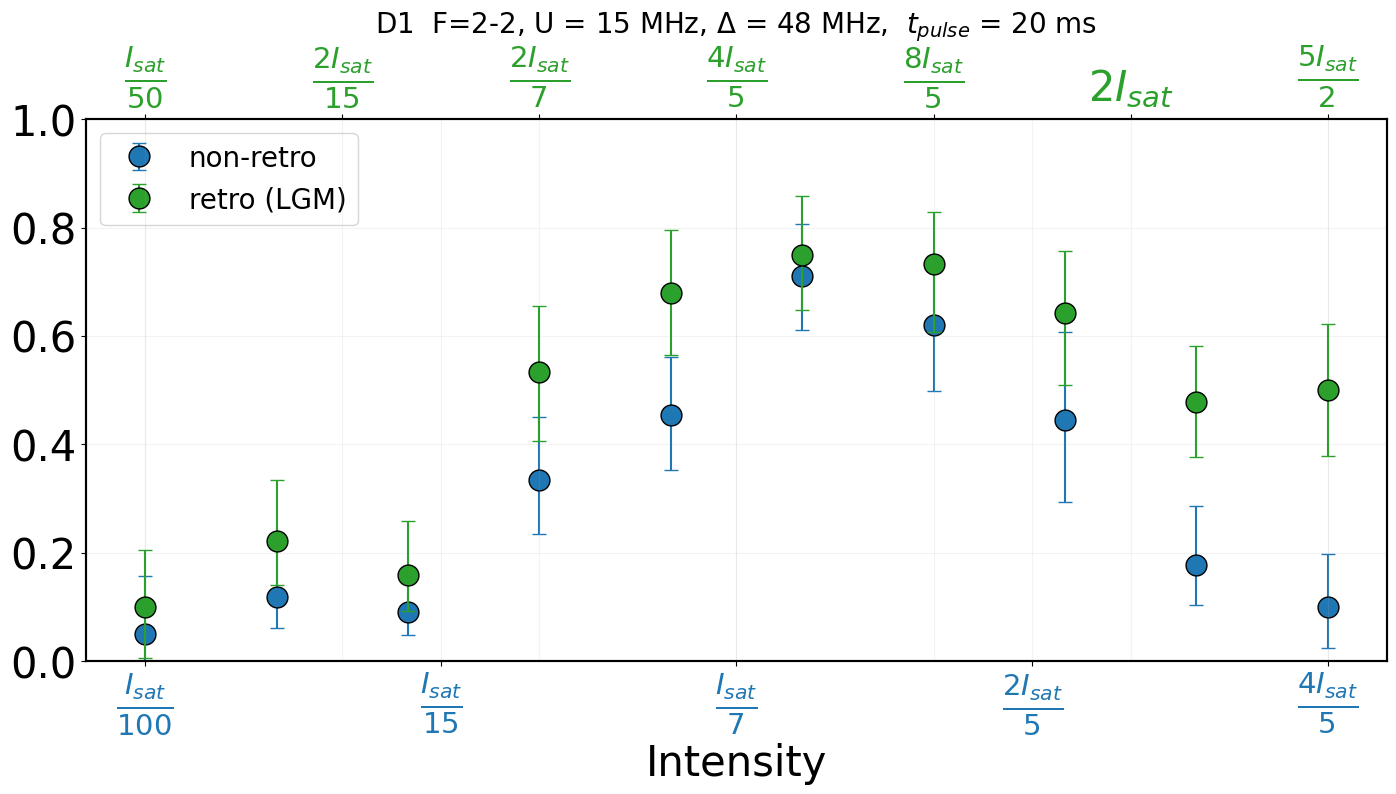

In [311]:

threshold = 60

reloadMyModules(26)
dataset1 = ta.standardTransferAnalysis(20, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.05
avgTferData1[5] = 0.71
avgTferData1[6] = 0.62
avgTferData1[9] = 0.1

reloadMyModules(27)
dataset2 = ta.standardTransferAnalysis(8, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

avgTferData2[0] = 0.1
avgTferData2[5] = 0.75
avgTferData2[4] = 0.68




matplotlib.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(15, 7))
fig.tight_layout()
ax2 = ax1.twiny()
t = np.linspace(key1[0], max(key1), len(key1))
ax1.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label= 'non-retro')
ax2.errorbar(key2,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 15,markerfacecolor=color2,markeredgecolor='k',capsize=5,label = 'retro (LGM)')


x1values = [0,.05,.1,.15,.2]
x1labels = [r'$\frac{I_{sat}}{100}$',r'$\frac{I_{sat}}{15}$',
           r'$\frac{I_{sat}}{7}$',r'$\frac{2I_{sat}}{5}$',r'$\frac{4I_{sat}}{5}$']
ax1.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
ax1.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
ax1.set_xticks(x1values)
ax1.set_xticklabels(x1labels,color='tab:blue')

x2values = [0,.05,.1,.15,.2,.25,.3]
x2labels = [r'$\frac{I_{sat}}{50}$',r'$\frac{2I_{sat}}{15}$',
           r'$\frac{2I_{sat}}{7}$',r'$\frac{4I_{sat}}{5}$',r'$\frac{8I_{sat}}{5}$',
            r'$2I_{sat}$',r'$\frac{5I_{sat}}{2}$']

ax2.set_xticks(x2values)
ax2.set_xticklabels(x2labels,color='tab:green')

# Add legends for both sets of data
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left',fontsize=20)
# plt.legend(loc = 2, fontsize=20)
plt.ylim(0,1)
ax1.set_xlabel('Intensity')
plt.ylabel(r'$P_{2 \rightarrow 1}  $')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r'D1  F=2-2, U = 15 MHz, $\Delta$ = 48 MHz,  $t_{pulse}$ = 20 ms ',fontsize=20)

# Non-retro beam D2 F=2-3'

## detuning & trap depth

In [348]:
def VCOtoDetuning(V):
    resV = 1.47
    delta = (V-resV)*168
    # print(delta,'MHz')
    return delta

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 11:52:22: on (Y-M-D) 2023-10-27, And ended at 11:56:21: on 2023-10-27
Experiment Notes:  

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 11:58:50: on (Y-M-D) 2023-10-27, And ended at 12:2:48: on 2023-10-27
Experiment Notes:  

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:4:39: on (Y-M-D) 2023-10-27, And ended at 12:8:37: on 2023-10-27
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

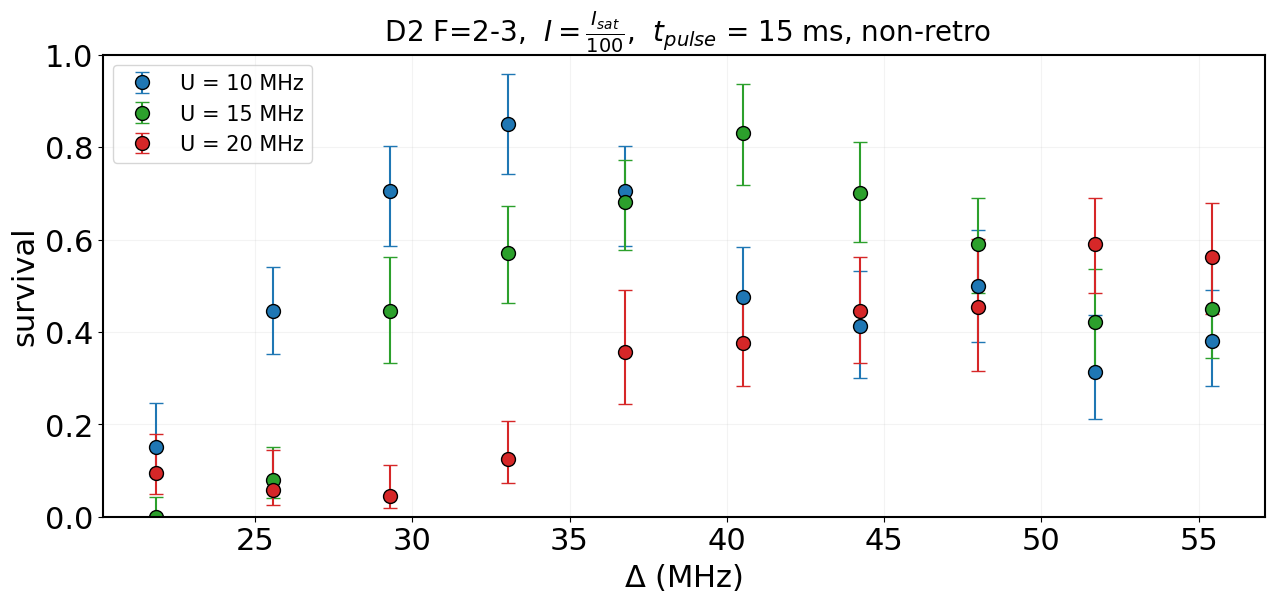

In [415]:
reloadMyModules(27)
threshold = 65

#10 MHz
dataset1 = ta.standardTransferAnalysis(33, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[3]=.85

# 15 MHz
dataset2 = ta.standardTransferAnalysis(34, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   
avgTferData2[5]=.83
avgTferData2[6]=.7
#20 MHz
dataset3 = ta.standardTransferAnalysis(35, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = ThresholdValue)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

converted_mhz_values10 = []
for i in key1:
    delta = VCOtoDetuning(i)
    converted_mhz_values10.append(delta)

    
converted_mhz_values20 = []
for i in key3:
    delta = VCOtoDetuning(i)
    converted_mhz_values20.append(delta)
    
fig, ax = plt.subplots(figsize=(15, 6))
# print(np.linspace(0,max(converted_mhz_values),len(converted_mhz_values)))
ax.errorbar(converted_mhz_values10,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='U = 10 MHz')
ax.errorbar(converted_mhz_values10,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='U = 15 MHz')
ax.errorbar(converted_mhz_values10,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5, label='U = 20 MHz')

ax.grid(which='minor', alpha=1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
# plt.legend(loc=4, ncol = 2,prop={'size': 10})
plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'$ \Delta \ \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
plt.title(r' D2 F=2-3,  $I= \frac{I_{sat}}{100}$,  $t_{pulse}$ = 15 ms, non-retro' ,fontsize=20);

## Intensity 

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:21:52: on (Y-M-D) 2023-10-27, And ended at 12:25:52: on 2023-10-27
Experiment Notes:  



Text(0.5, 1.0, 'D2  F=2-3, U = 15 MHz, $\\Delta$ = 41 MHz, non-retro ')

<Figure size 30000x9600 with 0 Axes>

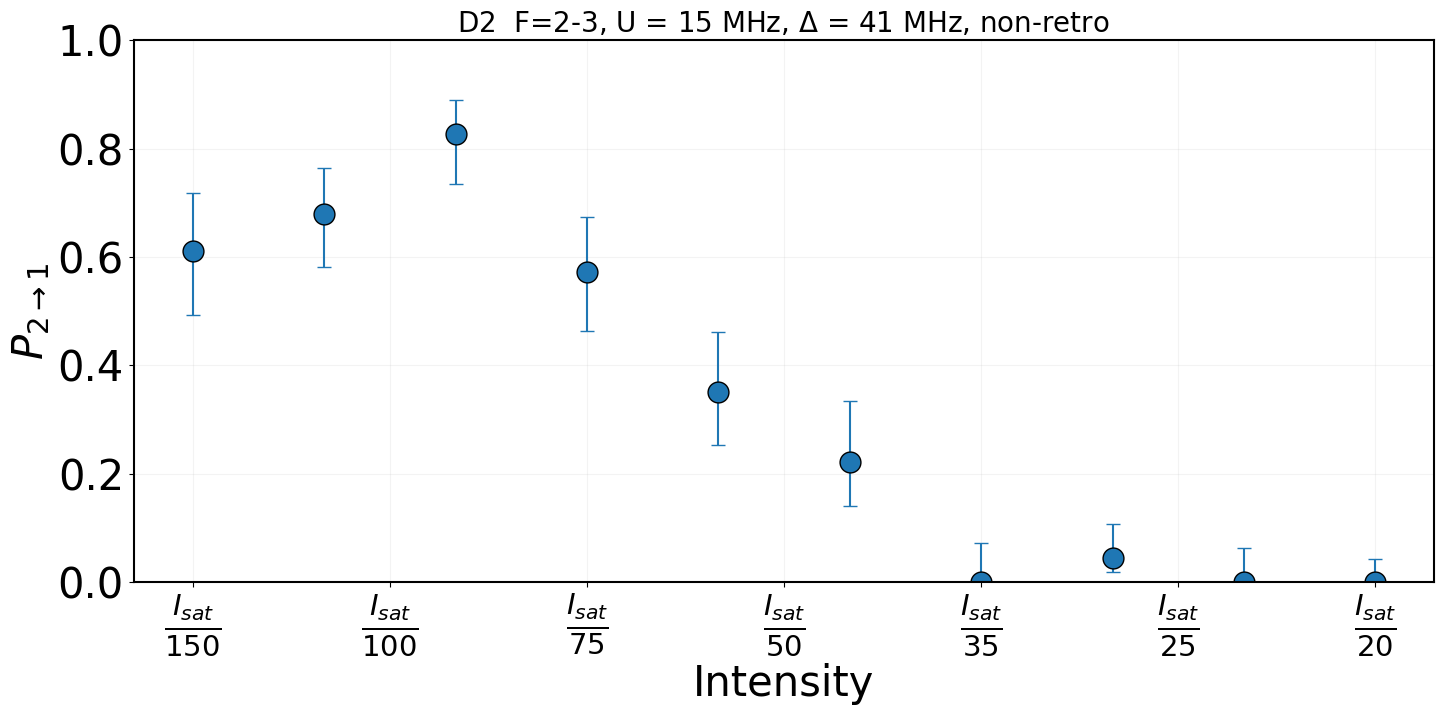

In [513]:
reloadMyModules(27)
threshold = 60

#20
dataset1 = ta.standardTransferAnalysis(37, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$t_{pulse}$ = 10 ms')
xvalues = [0,.05,.1,.15,.2,.25,.3]
xlabels = [r'$\frac{I_{sat}}{150}$',r'$\frac{I_{sat}}{100}$',r'$\frac{I_{sat}}{75}$',
           r'$\frac{I_{sat}}{50}$',r'$\frac{I_{sat}}{35}$',r'$\frac{I_{sat}}{25}$',
            r'$\frac{I_{sat}}{20}$']
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels)

# plt.legend(loc = 1, fontsize=20)
plt.ylim(0,1)
plt.xlabel('Intensity')
plt.ylabel(r'$P_{2 \rightarrow 1}  $')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r'D2  F=2-3, U = 15 MHz, $\Delta$ = 41 MHz, non-retro ',fontsize=20)

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 14:42:17: on (Y-M-D) 2023-10-27, And ended at 14:46:15: on 2023-10-27
Experiment Notes:  



Text(0.5, 1.0, 'D2  F=2-3, U = 15 MHz, $\\Delta$ = 41 MHz, non-retro ')

<Figure size 30000x9600 with 0 Axes>

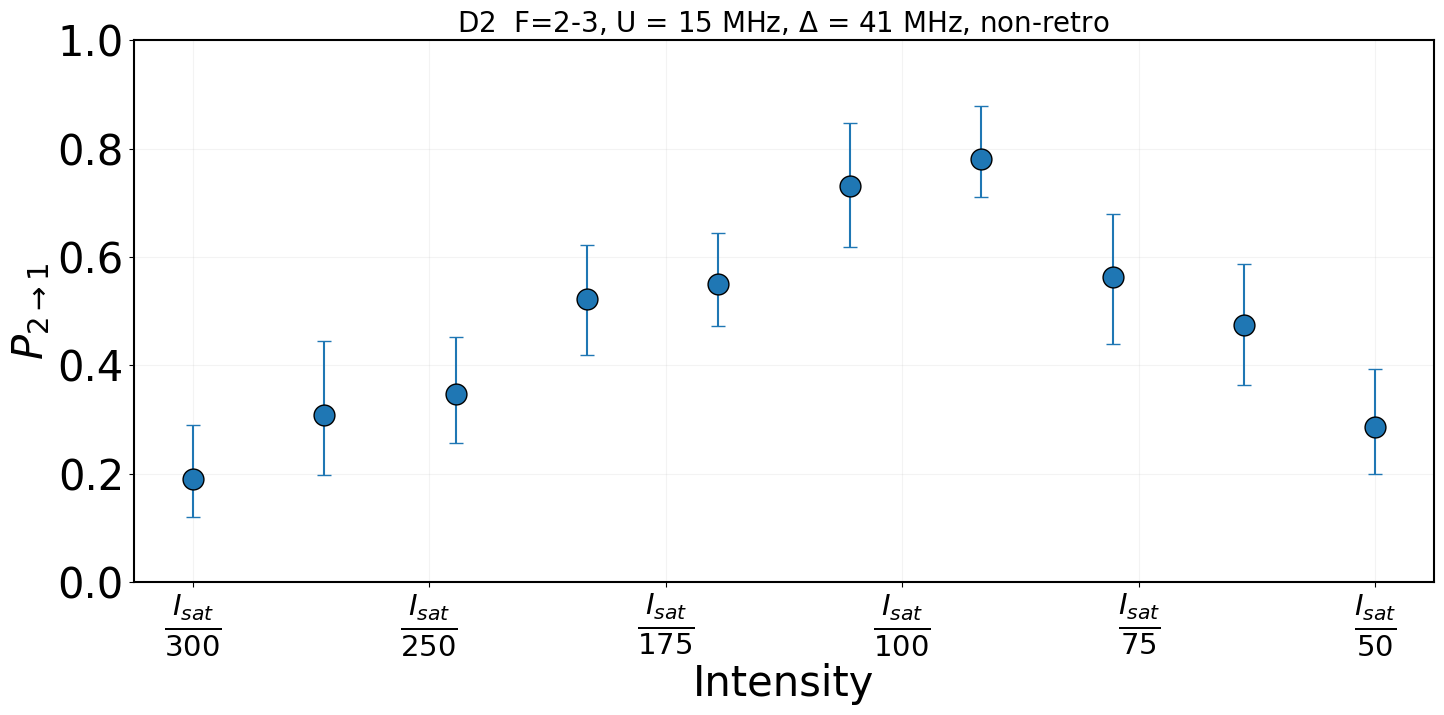

In [514]:
reloadMyModules(27)
threshold = 60

#20
dataset1 = ta.standardTransferAnalysis(52, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()
avgTferData1[4]=.55
avgTferData1[5]=.73
avgTferData1[6]=.78
avgTferData1
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$t_{pulse}$ = 10 ms')
xvalues = [0,.02,.04,.06,.08,.1]
xlabels = [r'$\frac{I_{sat}}{300}$',r'$\frac{I_{sat}}{250}$',r'$\frac{I_{sat}}{175}$',
           r'$\frac{I_{sat}}{100}$',r'$\frac{I_{sat}}{75}$',r'$\frac{I_{sat}}{50}$']
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
formatter = ScalarFormatter(useMathText=False)
formatter.set_scientific(False)
plt.gca().xaxis.set_major_formatter(formatter)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
ax.set_xticks(xvalues)
ax.set_xticklabels(xlabels)

# plt.legend(loc = 1, fontsize=20)
plt.ylim(0,1)
plt.xlabel('Intensity')
plt.ylabel(r'$P_{2 \rightarrow 1}  $')
plt.rcParams["axes.linewidth"] = 1.5
plt.title(r'D2  F=2-3, U = 15 MHz, $\Delta$ = 41 MHz, non-retro ',fontsize=20)

## pulse duration 

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:22:8: on (Y-M-D) 2023-10-26, And ended at 12:25:58: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 4000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:1:45: on (Y-M-D) 2023-8-12, And ended at 14:15:37: on 2023-8-12
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

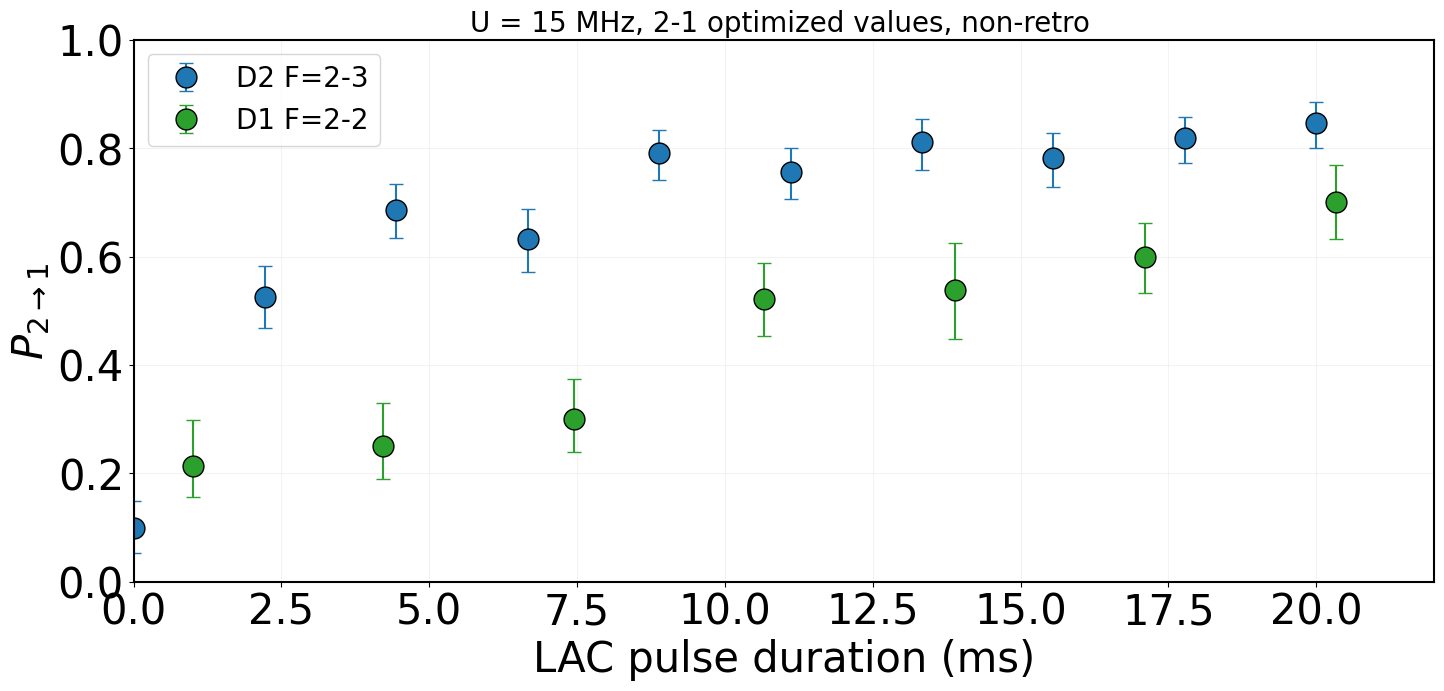

In [508]:
reloadMyModules(26,'october')
fileId = 16
threshold = 70

dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.5
    lo = avgTferErr1[i][1]/1.5
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[6] = .7

reloadMyModules(12,'August')
dataset2 = ta.standardTransferAnalysis(17, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 40)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()
t = np.linspace(key1[0], max(key1), len(key1))
avgTferData2[0] = .1

# ticks = np.arange(0,30,5)
ax.errorbar(key2,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 15,markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'D2 F=2-3')
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 15,markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'D1 F=2-2')


plt.legend(loc=2, ncol = 1 ,prop={'size': 20})
plt.ylim(0,1)
plt.xlim(0,22)
plt.xlabel('LAC pulse duration (ms)')
plt.ylabel(r'$P_{2 \rightarrow 1} $')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
# ax.set_xlim(left=-.2)
plt.title(r'U = 15 MHz, 2-1 optimized values, non-retro ',fontsize=20);
reloadMyModules(26,'october')

In [439]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

Number of Pictures: 4000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:1:45: on (Y-M-D) 2023-8-12, And ended at 14:15:37: on 2023-8-12
Experiment Notes:  

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:22:8: on (Y-M-D) 2023-10-26, And ended at 12:25:58: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

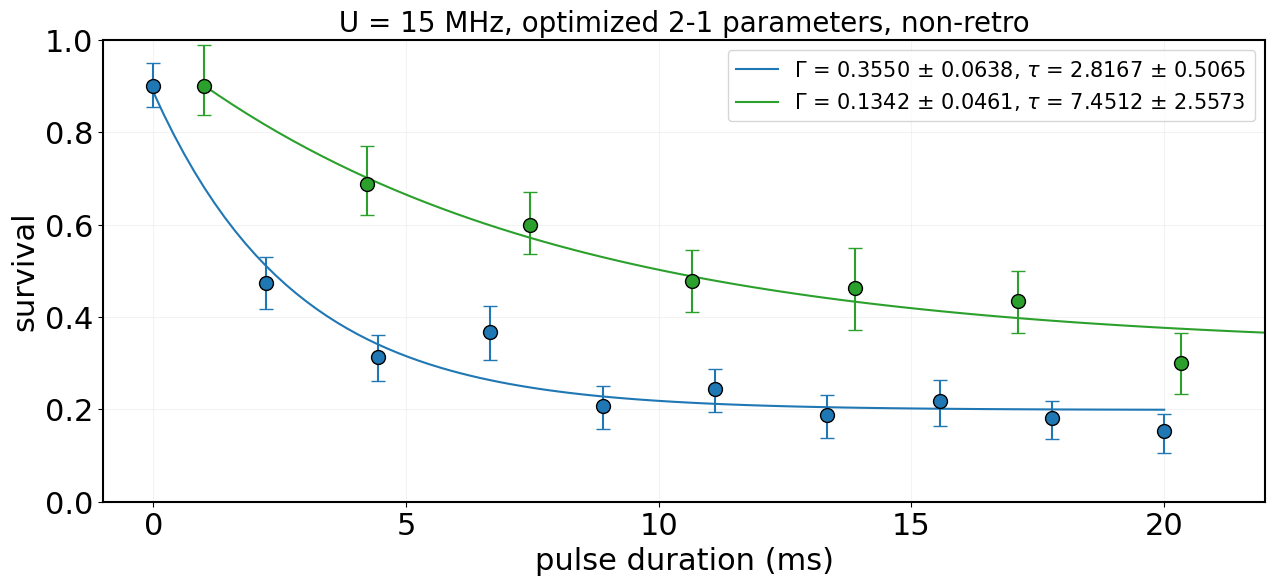

In [482]:
##pulse duration
reloadMyModules(12,'August')
fileId = 17
threshold = 40
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)
fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.1

x_data = key1
y_data = 1-avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / (decay_constant ** 2)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,1-avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
plt.plot(x_fit, y_fit, 'tab:blue',label=legend_label)
plt.xlim(-1,22)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.xlim(-1,22)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
plt.title(r' U = 15 MHz, optimized 2-1 parameters, non-retro ',fontsize=20)
reloadMyModules(26,'october')
fileId = 16
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
avgTferData1[6] = .7
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.5
    lo = avgTferErr1[i][1]/1.5
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)
matplotlib.rc('font', **font)
avgTferData1[0] = 0.1
avgTferData1[2] = 0.4
x_data = key1
y_data = 1-avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / (decay_constant ** 2)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),22)
ax.errorbar(key1,1-avgTferData1, yerr=err1,ls='none',ecolor='tab:green',marker = 'o',markersize = 10,
            markerfacecolor='tab:green',markeredgecolor='k',capsize=5)
ax.plot(x_fit, y_fit, 'tab:green',label=legend_label)


ax.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.xlim(-1,22)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
plt.title(r' U = 15 MHz, optimized 2-1 parameters, non-retro ',fontsize=20)
reloadMyModules(26,'october')

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:22:8: on (Y-M-D) 2023-10-26, And ended at 12:25:58: on 2023-10-26
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

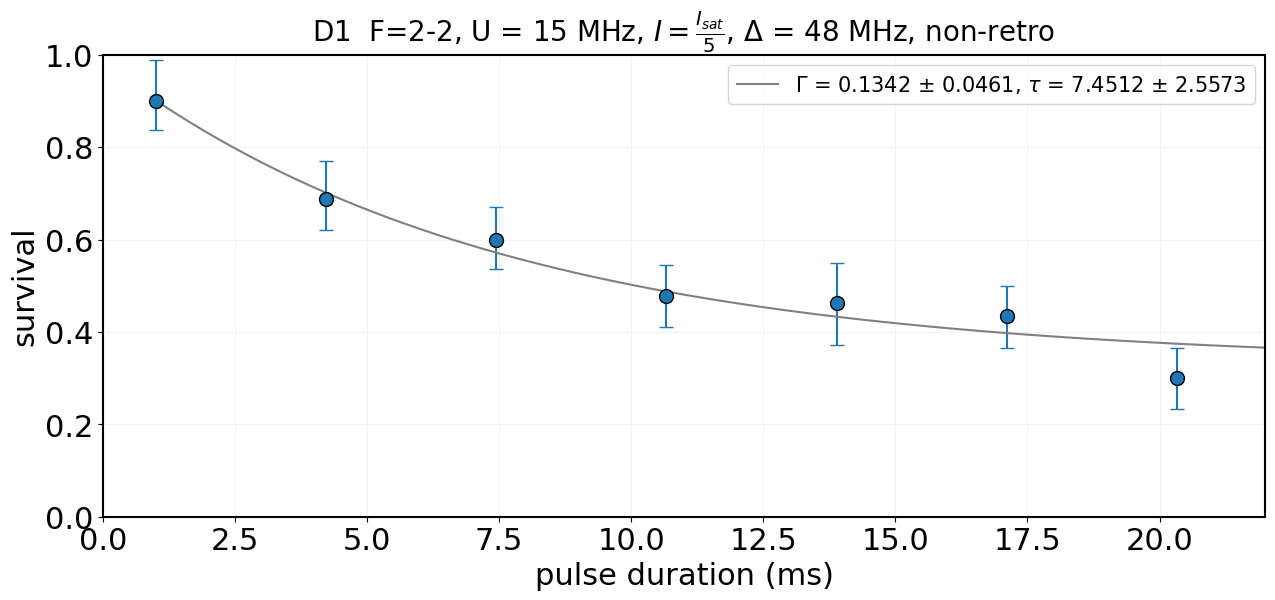

In [465]:
##pulse duration
reloadMyModules(26,'october')
fileId = 16
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
avgTferData1[6] = .7
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]/1.5
    lo = avgTferErr1[i][1]/1.5
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
plt.figure(dpi=1200)
fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
avgTferData1[0] = 0.1
avgTferData1[2] = 0.4
x_data = key1
y_data = 1-avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / (decay_constant ** 2)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),22)
ax.errorbar(key1,1-avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.xlim(0,22)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
plt.title(r'D1  F=2-2, U = 15 MHz, $I= \frac{I_{sat}}{5}$, $\Delta$ = 48 MHz, non-retro ',fontsize=20);reloadMyModules(26,'october')

# D2 2-1 on probe path

In [23]:
def VCOtoDetuning(V):
    resV = 1.4836
    delta = (V-resV)*168
    # print(delta,'MHz')
    return delta

## detuning

### File 9 (2_0_rate_measurement):  

Number of Pictures: 3000; Picture Dimensions: 5 x 10
Variations: 15;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:8:4: on (Y-M-D) 2023-11-16, And ended at 10:22:4: on 2023-11-16
Experiment Notes:  



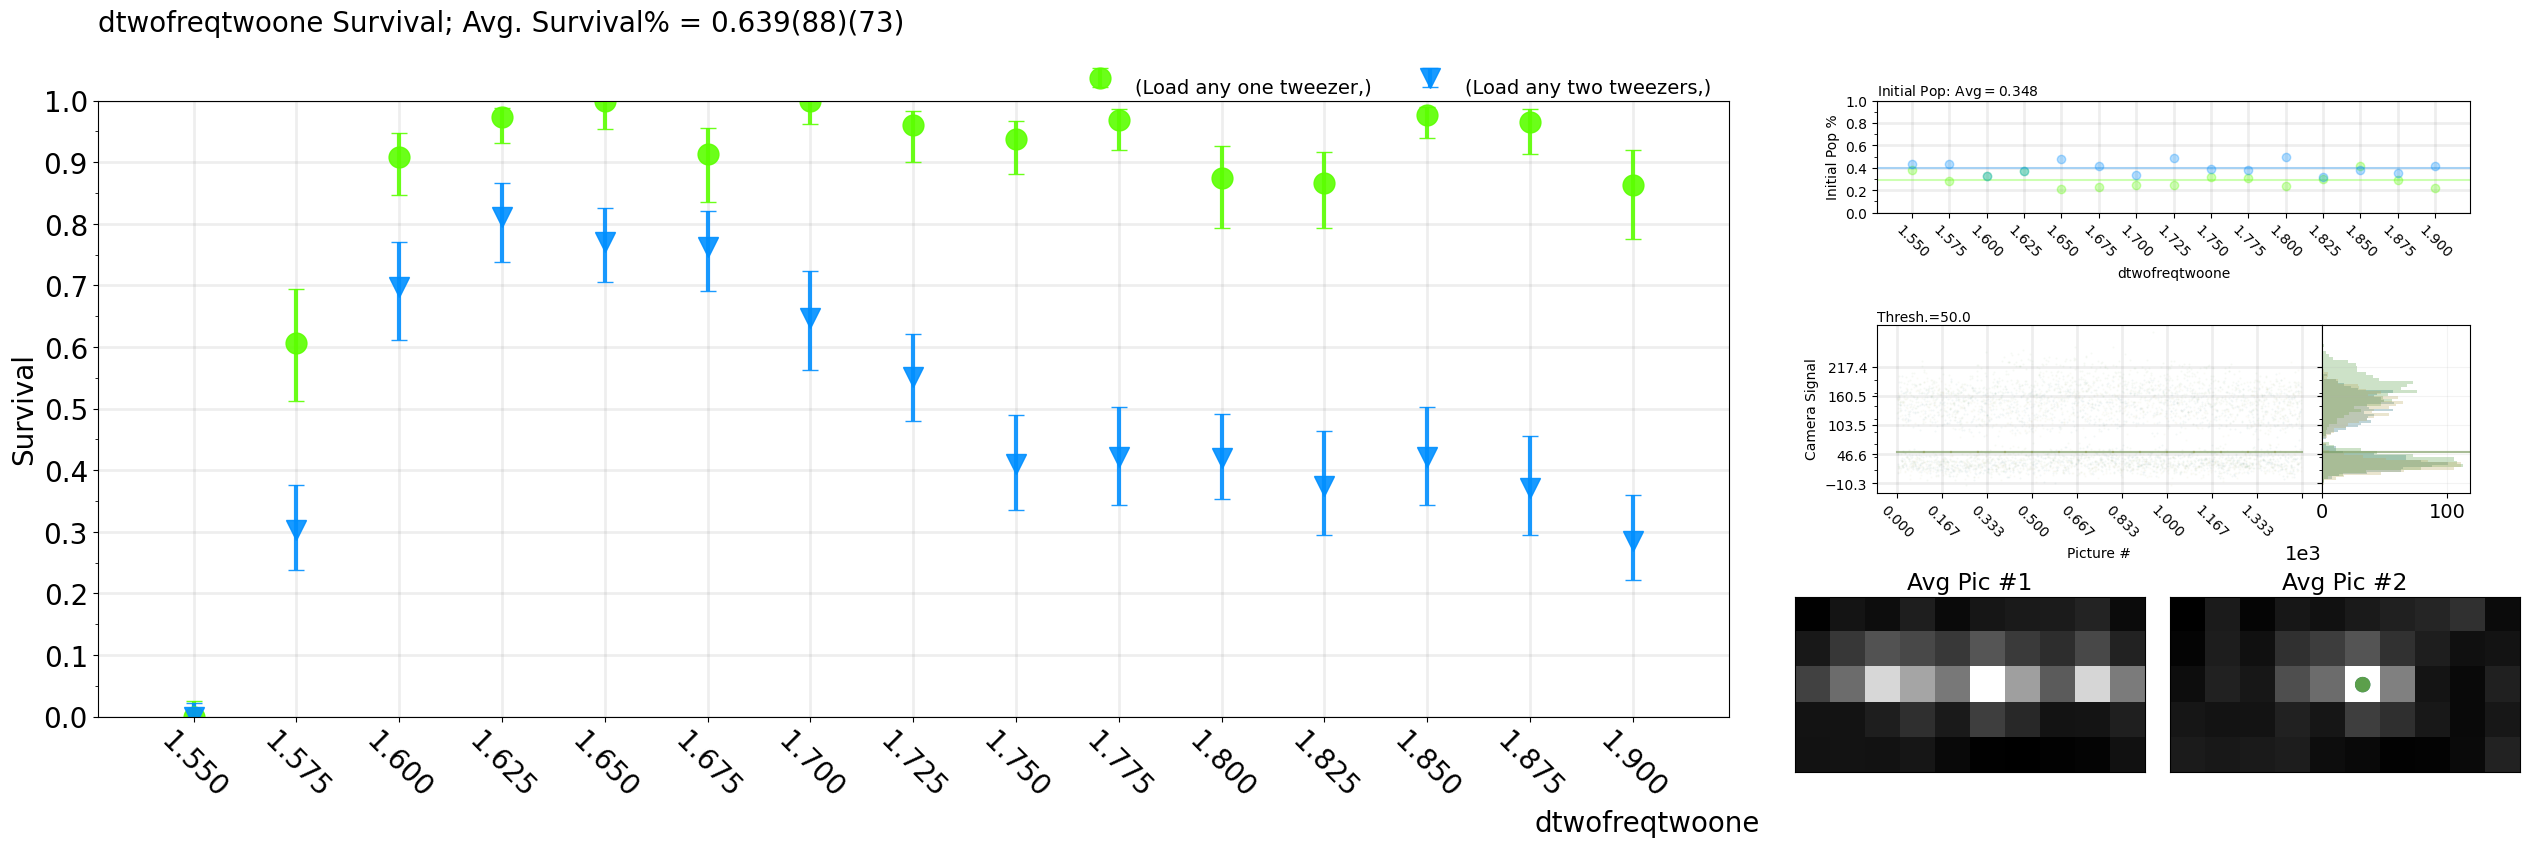

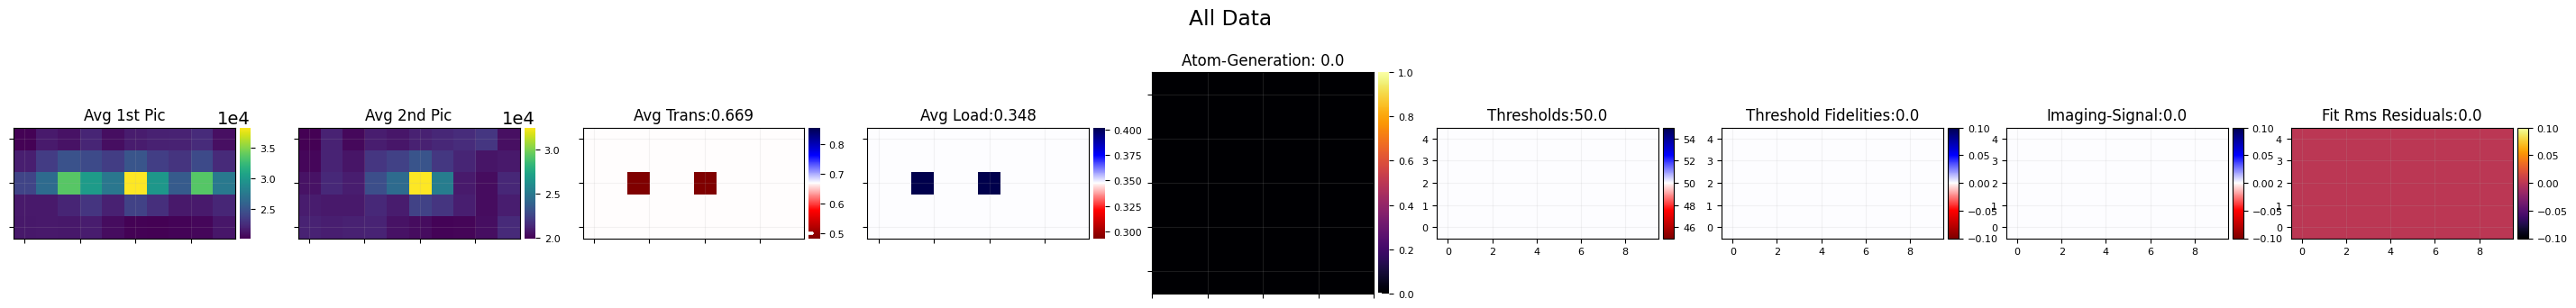

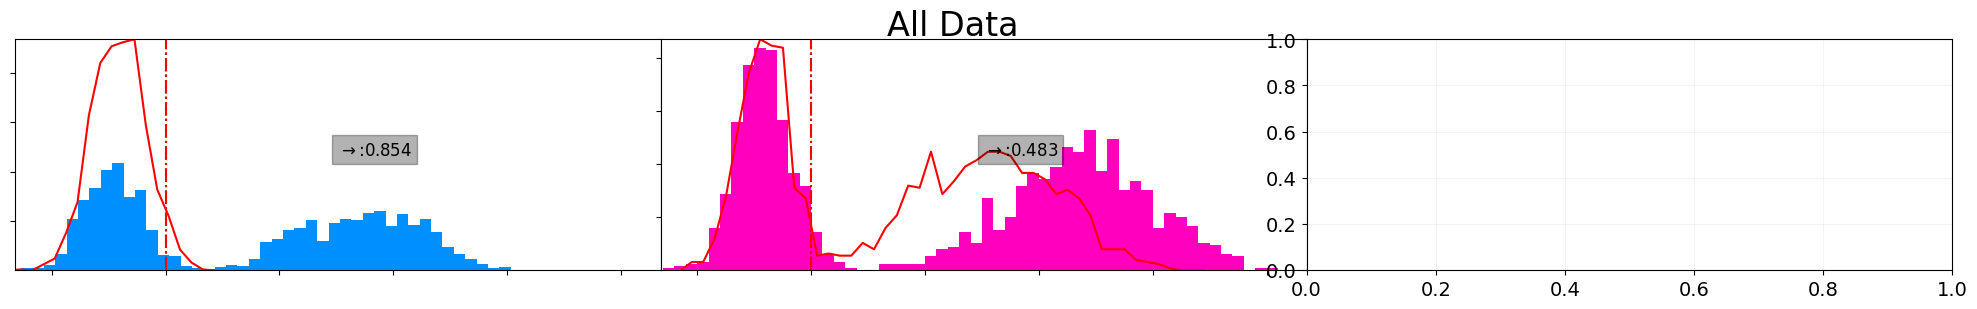

In [17]:
reloadMyModules(16,'november')
mp.Transfer(9, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 50)]);

Number of Pictures: 3000; Picture Dimensions: 5 x 10
Variations: 15;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:8:4: on (Y-M-D) 2023-11-16, And ended at 10:22:4: on 2023-11-16
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

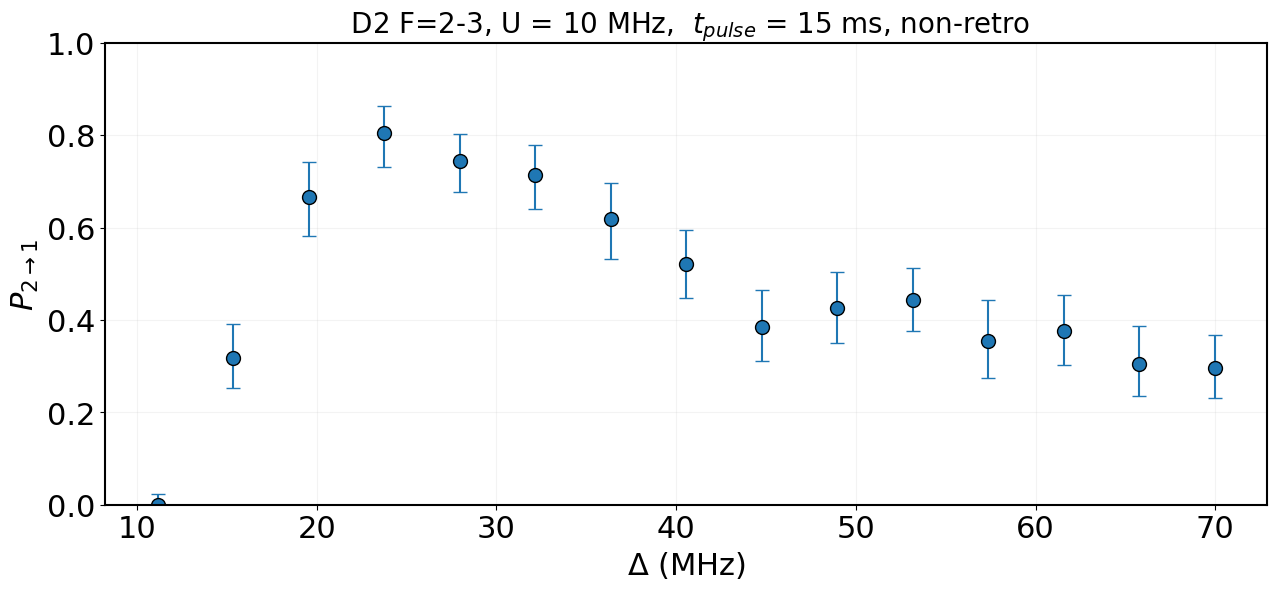

In [106]:
reloadMyModules(16,'november')
threshold = 55
fileID = 9

dataset1 = ta.standardTransferAnalysis(fileID, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

converted_mhz_values10 = []
for i in key1:
    delta = VCOtoDetuning(i)
    converted_mhz_values10.append(delta)

    
fig, ax = plt.subplots(figsize=(15, 6))
ax.errorbar(converted_mhz_values10,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
ax.grid(which='minor', alpha=1)
# plt.legend(loc='upper left',fontsize=15)
plt.ylim(0,1)
plt.ylabel(r'$P_{2\rightarrow 1}$')
plt.xlabel(r'$ \Delta \ \mathrm{(MHz)}$')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
plt.title(r' D2 F=2-3, U = 10 MHz,  $t_{pulse}$ = 15 ms, non-retro' ,fontsize=20);

## pulse duration 

### File 15 (2_0_rate_measurement):  

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 11:42:52: on (Y-M-D) 2023-11-16, And ended at 11:47:53: on 2023-11-16
Experiment Notes:  



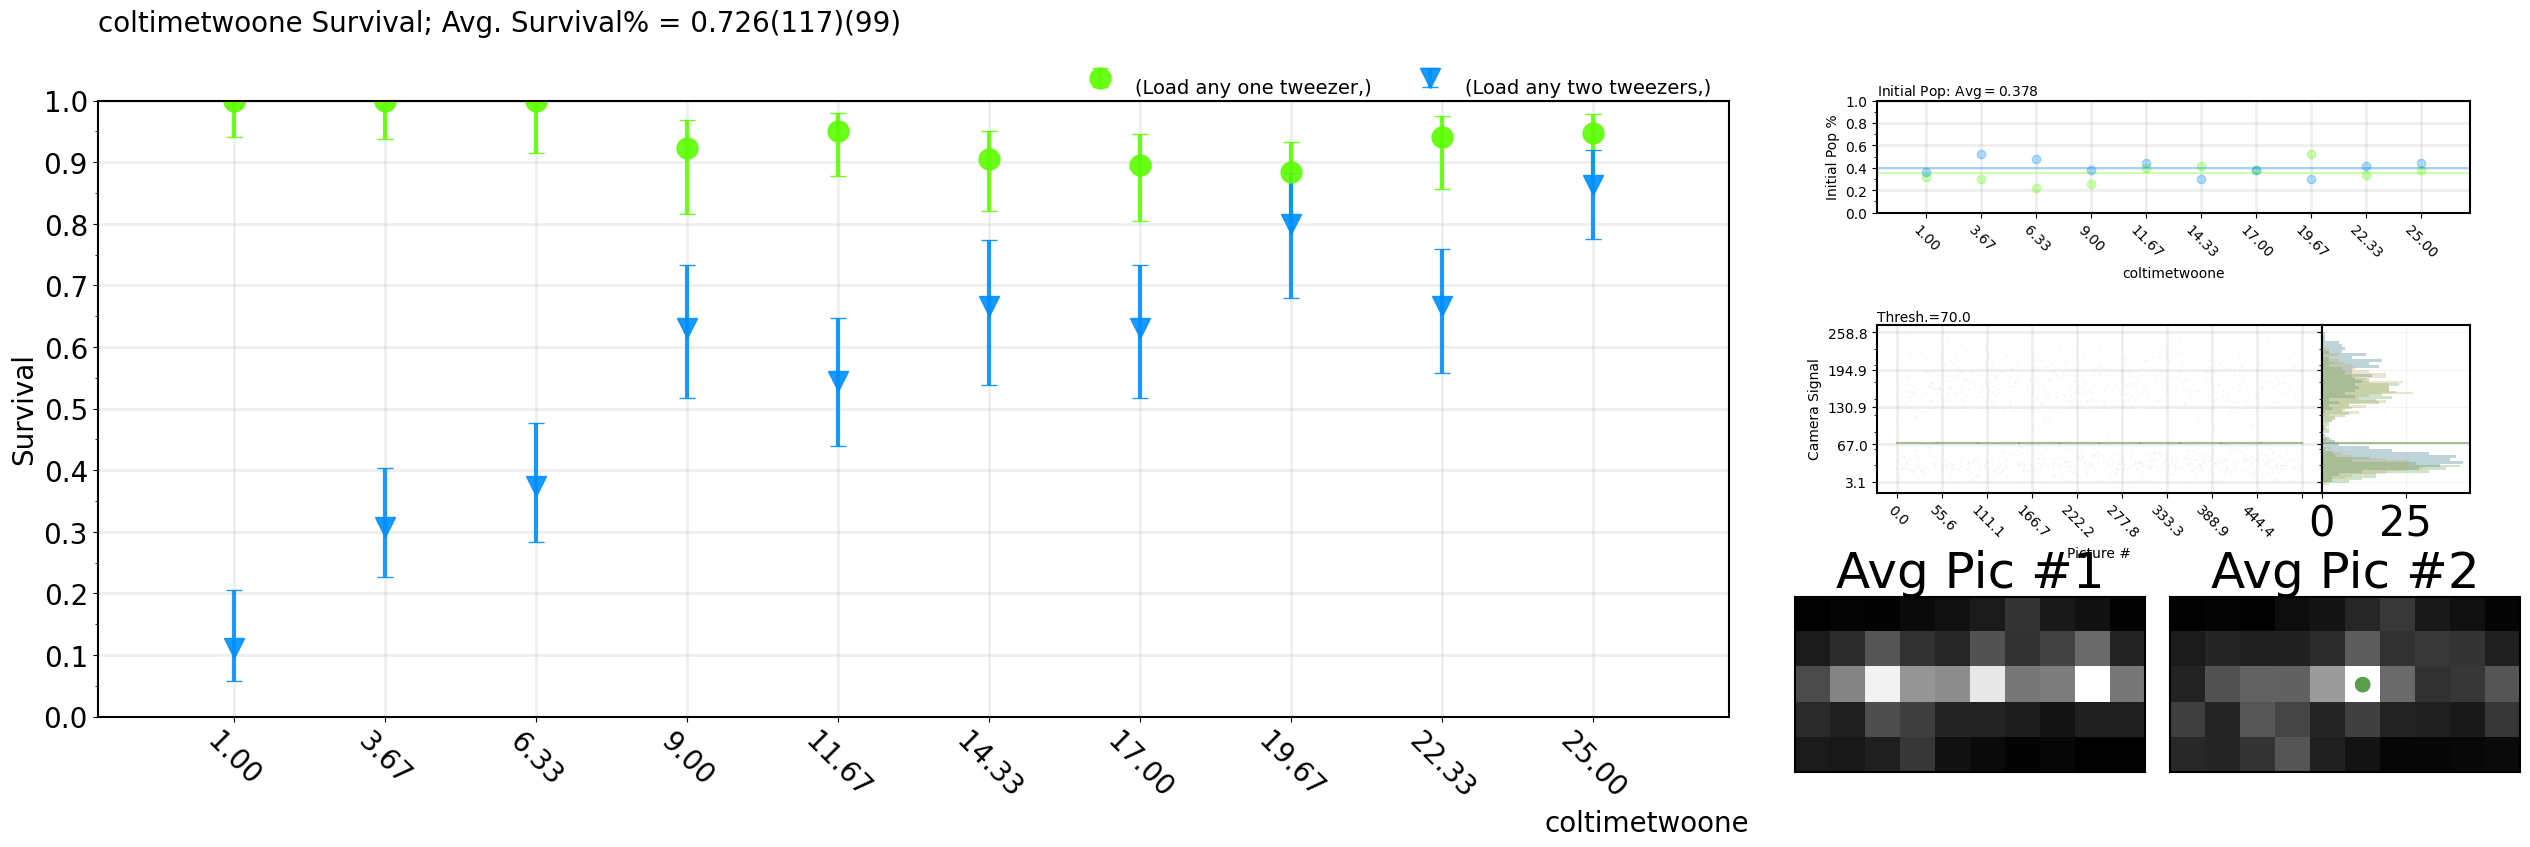

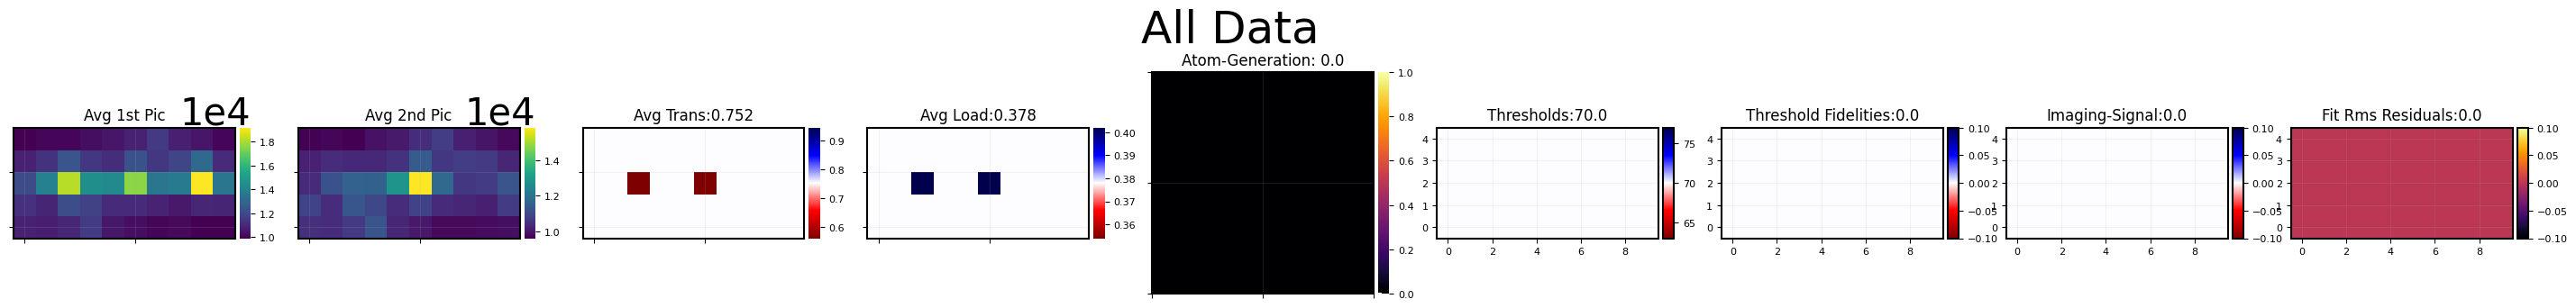

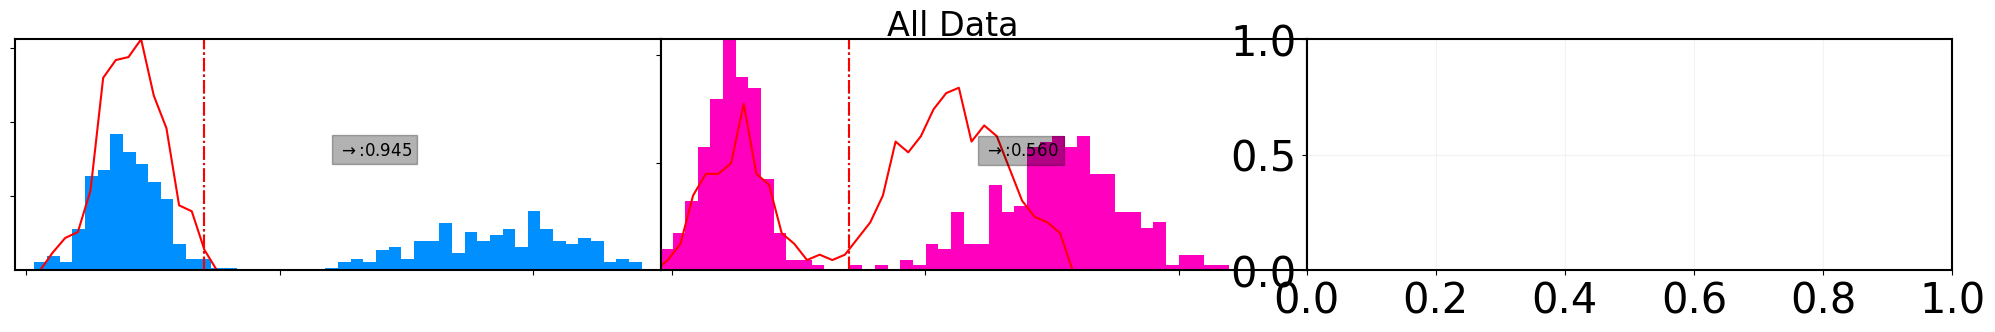

In [69]:
reloadMyModules(16,'november')
mp.Transfer(15, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 70)]);

Number of Pictures: 2000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:46:58: on (Y-M-D) 2023-11-16, And ended at 10:56:18: on 2023-11-16
Experiment Notes:  



<Figure size 30000x9600 with 0 Axes>

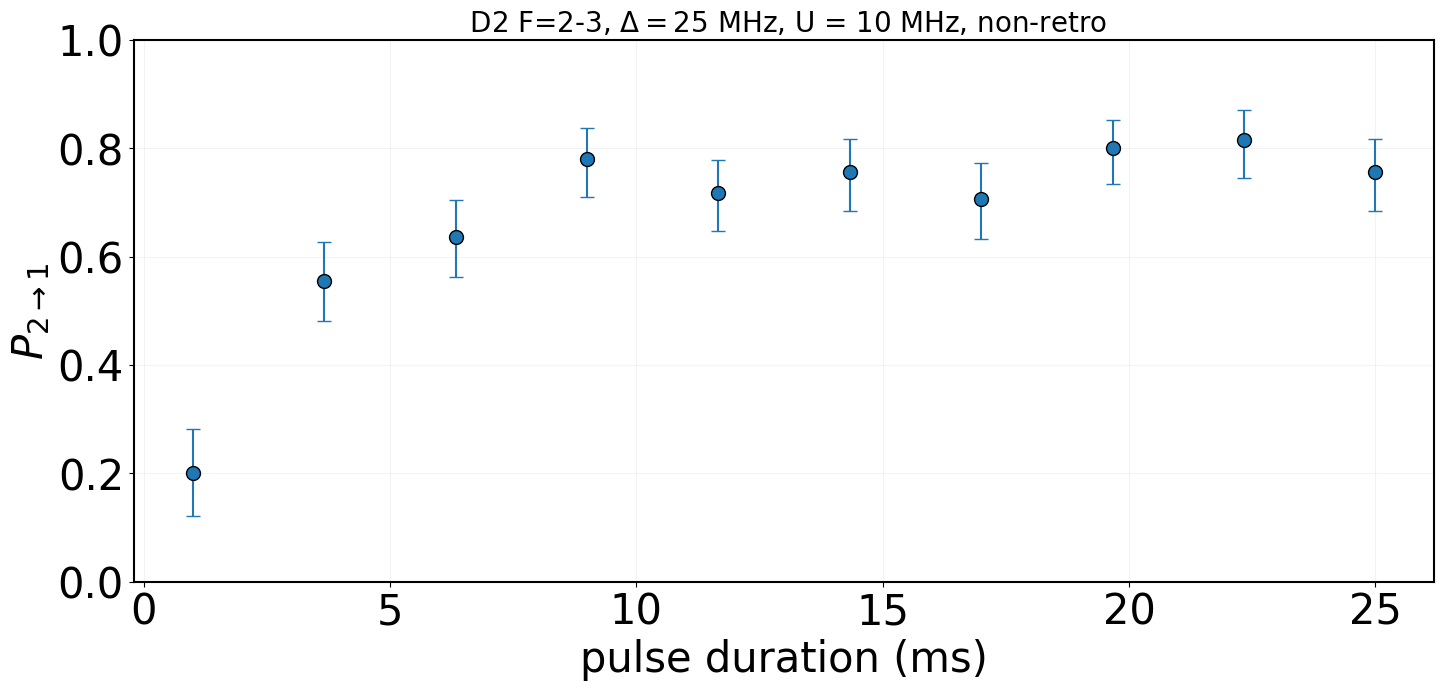

In [105]:
reloadMyModules(16,'November')
threshold = 40
dataset2 = ta.standardTransferAnalysis(11, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)
fig, ax = plt.subplots(figsize=(15, 7))
fig.tight_layout()
t = np.linspace(key1[0], max(key1), len(key1))
avgTferData2[0] = .2

# ticks = np.arange(0,30,5)
ax.errorbar(key2,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'D2 F=2-3')


plt.ylim(0,1)
# plt.xlim(0,22)
plt.xlabel('pulse duration (ms)')
plt.ylabel(r'$P_{2 \rightarrow 1} $')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 
# ax.set_xlim(left=-.2)
plt.title(r' D2 F=2-3, $\Delta= 25 \ \mathrm{MHz}$, U = 10 MHz, non-retro' ,fontsize=20);reloadMyModules(26,'october')

## Intensity 

measured power for above plots = 0.0448 $\mu W$

In [103]:
# units in mm

lmbda = 780e-6

### collimated beam diameter

f_col = 5.8 # focal length of collimating lens  c260=15.29  c230= 5.8  c280=18.4   c220 11 
fiber_NA = 0.13 # nominal fiber numerical aperture
beam_radius = f_col*fiber_NA
print("collimated beam radius =",beam_radius, "mm")
### spot size at focus
w_0 = beam_radius # collimated beam radius
f_foc = 100 # focal length of lens
M_2 = 1 # propagation constant (1 for ideal Gaussian)
w_F = lmbda*f_foc*M_2/(np.pi*w_0)  # beam radius at focal point (spot size)
beam_power = 0.0000448  # mW
intensity_col = beam_power/(np.pi*w_0**2)
intensity_foc = beam_power/(np.pi*w_F**2)
print('collimated beam area',np.pi*w_0**2,'mm')
print("spot size at focus =",w_F, "mm")
print("intensity at focus =",intensity_foc*10, "mW/cm^2")
D2I_sat_iso = 3.576
Ifactor = D2I_sat_iso/(intensity_foc*10)
print('I = I_sat/' + str(Ifactor))

collimated beam radius = 0.754 mm
collimated beam area 1.7860456890482548 mm
spot size at focus = 0.03292860891556455 mm
intensity at focus = 0.13151684232307992 mW/cm^2
I = I_sat/27.190433839761123


## D2 2-1 vs temp

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:46:22: on (Y-M-D) 2023-11-18, And ended at 15:1:31: on 2023-11-18
Experiment Notes:  

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 14:46:22: on (Y-M-D) 2023-11-18, And ended at 15:1:31: on 2023-11-18
Experiment Notes:  



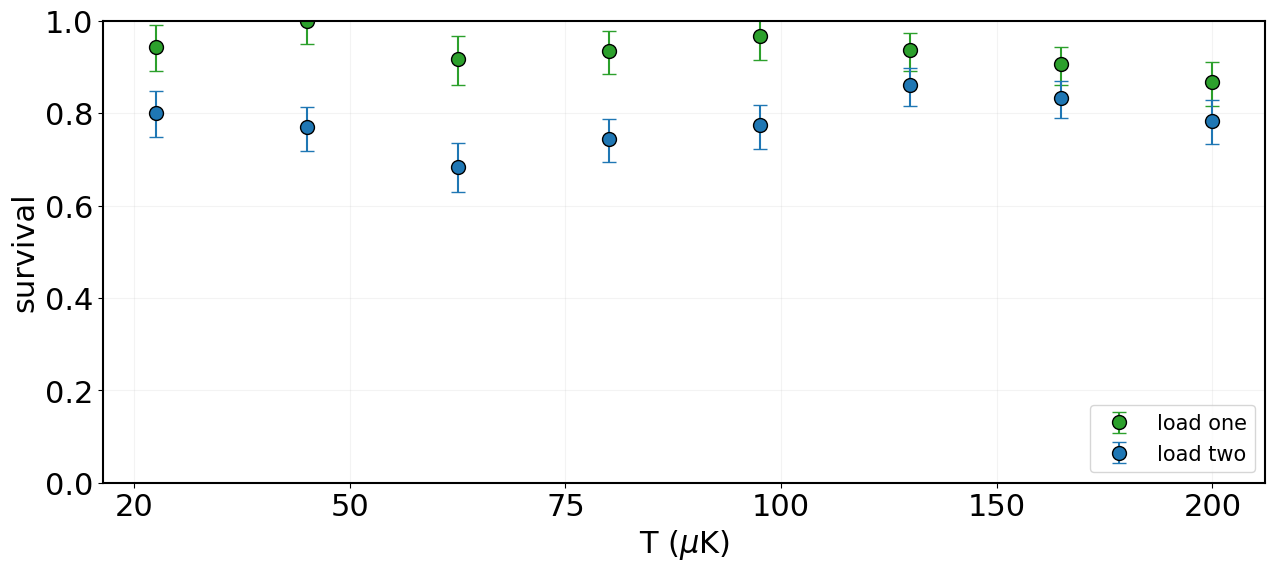

In [395]:
reloadMyModules(18,'november')
fileId = 28
threshold = 70
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 35)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

avgTferData1[0] = 0.8
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / (decay_constant ** 2)

dataset2 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 60)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(key1,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5, label=r'load one')

matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\beta$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'load two')
# plt.plot(x_fit, y_fit, 'gray',label=legend_label)
values = [0,10,20,30,40,50]
values = [x for x in values]
labels = [20,50,75,100,150,200]
plt.xticks(values, labels)
plt.legend(loc= 'lower right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'T $(\mu \mathrm{K})$')
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain')
